In [318]:
import pandas as pd

In [319]:
cars_cleaned = pd.read_csv('../../data/scrapped/voitures_clean.csv')
cars_cleaned.head()

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,Première main,Prix,Ville_grouped,Age_vehicule
0,Temara,Fiat,Punto,2007,224999.5,Diesel,5.0,Manuelle,5.0,WW au Maroc,Non,60000.0,Temara,18
1,Casablanca,Volkswagen,Touareg,2005,2499.5,Diesel,10.0,Automatique,5.0,WW au Maroc,Oui,90000.0,Casablanca,20
2,Dakhla,Toyota,Prado,2007,224999.5,Diesel,12.0,Manuelle,5.0,WW au Maroc,Non,97000.0,Autres,18
3,Khouribga,Volkswagen,Tiguan,2014,184999.5,Diesel,8.0,Automatique,5.0,Dédouanée,Non,255000.0,Autres,11
4,Meknès,Peugeot,308,2009,224999.5,Diesel,6.0,Manuelle,5.0,WW au Maroc,Non,85000.0,Meknès,16


In [320]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [321]:
df3 = cars_cleaned.copy()
df4 = cars_cleaned.copy()
df5 = cars_cleaned.copy()
df6 = cars_cleaned.copy()

# Régression lineaire multiples avec Prix

In [322]:
df3 = df3.drop(columns=['Ville','Année-Modèle'])
# ==== TARGET ENCODING POUR MARQUE ET MODÈLE ====
for col in ['Marque', 'Modèle']:
    means = df3.groupby(col)['Prix'].mean()
    df3[col + '_te'] = df3[col].map(means)

# Supprimer les colonnes originales
df3 = df3.drop(columns=['Marque', 'Modèle'])

# ==== ONE-HOT POUR AUTRES CATÉGORIELLES ====
df3_encoded = pd.get_dummies(
    df3,
    columns=['Boite de vitesses', 'Type de carburant', 'Origine', 'Première main','Ville_grouped'],
    drop_first=True
)

# ==== VARIABLES NUMÉRIQUES + CATÉGORIELLES ====
X = df3_encoded.drop(['Prix'], axis=1)
y = df3_encoded['Prix']

# ==== SPLIT TRAIN / TEST ====
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== STANDARDISATION UNIQUEMENT DES VARIABLES NUMÉRIQUES ====
from sklearn.preprocessing import StandardScaler
num_cols = ['Kilométrage', 'Age_vehicule', 'Nombre de portes', 'Puissance fiscale','Marque_te','Modèle_te']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ==== ALIGNEMENT DES COLONNES ====
X_train_scaled, X_test_scaled = X_train_scaled.align(X_test_scaled, join='left', axis=1, fill_value=0)
print(X_train_scaled)
# ==== MODÈLE RÉGRESSION LINÉAIRE ====
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ==== PRÉDICTIONS ====
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# ==== ÉVALUATION ====
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nPerformance sur {dataset_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return rmse, r2

# ==== ÉVALUATION DES PERFORMANCES ==== 
rmse_train, r2_train = evaluate_model(y_train, y_pred_train, "Train")
rmse_test, r2_test = evaluate_model(y_test, y_pred_test, "Test")


       Kilométrage  Puissance fiscale  Nombre de portes  Age_vehicule  \
16864    -0.488030          -0.647568          0.317749     -0.817069   
5561      0.968479          -0.647568          0.317749     -0.945033   
7023      0.089077          -0.647568          0.317749     -0.689106   
32838     2.617356           1.458569          0.317749      0.334604   
7374     -0.130773          -0.121034          0.317749     -0.817069   
...            ...                ...               ...           ...   
11284    -0.488030          -0.647568          0.317749     -1.200960   
44732    -0.020848           0.405501          0.317749     -0.561142   
38158     0.528778          -0.647568          0.317749     -0.433178   
860       0.418853          -0.647568          0.317749     -0.561142   
15795    -0.130773           0.405501          0.317749     -0.049287   

       Marque_te  Modèle_te  Boite de vitesses_Manuelle  \
16864  -0.694021   0.214606                        True   
5561 

Les performances de notre dataset avec la colonne Prix

# Histrogramme de la colonne Prix avant et après Log1p()

Prix – min : 20000.0  max : 315000.0


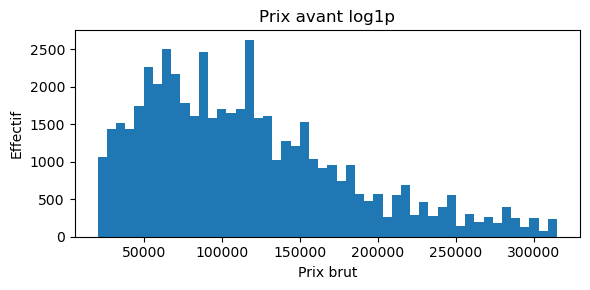

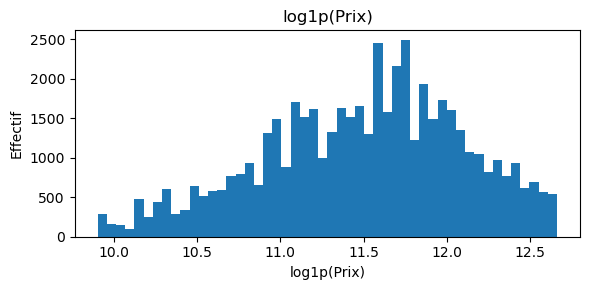

logPrix – min : 9.90353755128617  max : 12.660331092405906


In [323]:
print("Prix – min :", df5['Prix'].min(), " max :", df5['Prix'].max())

# 1) Histogramme du prix AVANT log‑transform
plt.figure(figsize=(6,3))
plt.hist(df5['Prix'], bins=50)
plt.title("Prix avant log1p")
plt.xlabel("Prix brut")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

# 2) Création de la cible log‑transformée
df5['logPrix'] = np.log1p(df5['Prix'])

# 3) Histogramme du prix APRÈS log‑transform
plt.figure(figsize=(6,3))
plt.hist(df5['logPrix'], bins=50)
plt.title("log1p(Prix)")
plt.xlabel("log1p(Prix)")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

# Vérification numérique post‑transform
print("logPrix – min :", df5['logPrix'].min(), " max :", df5['logPrix'].max())

La distribution brute du prix est fortement étalée et asymétrique (de 60000 DH à 237000 DH ), ce qui peut nuire aux modèles linéaires . 

Nous avons donc appliqué la transformation suivante : df['logPrix'] = np.log1p(df['Prix']).

L’histogramme “Avant log1p” montre une longue queue à droite, tandis que "log1p[Prix]" la distribution devient plus symétrique (centrée entre 11 et 12.37), stabilisant la variance et facilitant l’apprentissage.

# Régression linéaire multiple avec Log1p(Prix)

In [324]:
df6 = df6.drop(columns=['Ville'])

df6['logPrix'] = np.log1p(df6['Prix'])
# ==== TARGET ENCODING POUR MARQUE ET MODÈLE ====
for col in ['Marque','Modèle']:
    means = df6.groupby(col)['logPrix'].mean()
    df6[col + '_te'] = df6[col].map(means)
df6 = df6.drop(columns=['Marque','Modèle'])

# ==== ONE-HOT POUR AUTRES CATÉGORIELLES ====
df6_encoded = pd.get_dummies(
    df6,
    columns=['Boite de vitesses','Type de carburant','Origine','Première main',"Ville_grouped"],
    drop_first=True
)

# ==== VARIABLES NUMÉRIQUES + CATÉGORIELLES ====
X = df6_encoded.drop(['Prix','logPrix'], axis=1)
y = df6_encoded['logPrix']  # on va prédire logPrix

# ==== SPLIT TRAIN / TEST ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== STANDARDISATION UNIQUEMENT DES VARIABLES NUMÉRIQUES ====
num_cols = ['Kilométrage', 'Année-Modèle', 'Nombre de portes', 'Puissance fiscale','Marque_te','Modèle_te']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ==== ALIGNEMENT COLONNES TRAIN / TEST (optionnel mais sûr) ====
X_train_scaled, X_test_scaled = X_train_scaled.align(X_test_scaled, join='left', axis=1, fill_value=0)
print(X_train_scaled)
# ==== RÉGRESSION LINÉAIRE SUR LOG PRIX ====
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ==== PRÉDICTIONS ====
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# ==== ÉVALUATION ====
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    
    # Accuracy ±10% sur prix réel
    y_true_real = np.exp(y_true)
    y_pred_real = np.exp(y_pred)

    print(f"\nPerformance sur {dataset_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return rmse, r2

rmse_train, r2_train = evaluate_model(y_train, y_pred_train, "Train")
rmse_test, r2_test = evaluate_model(y_test, y_pred_test, "Test")

       Année-Modèle  Kilométrage  Puissance fiscale  Nombre de portes  \
16864      0.817069    -0.488030          -0.647568          0.317749   
5561       0.945033     0.968479          -0.647568          0.317749   
7023       0.689106     0.089077          -0.647568          0.317749   
32838     -0.334604     2.617356           1.458569          0.317749   
7374       0.817069    -0.130773          -0.121034          0.317749   
...             ...          ...                ...               ...   
11284      1.200960    -0.488030          -0.647568          0.317749   
44732      0.561142    -0.020848           0.405501          0.317749   
38158      0.433178     0.528778          -0.647568          0.317749   
860        0.561142     0.418853          -0.647568          0.317749   
15795      0.049287    -0.130773           0.405501          0.317749   

       Age_vehicule  Marque_te  Modèle_te  Boite de vitesses_Manuelle  \
16864             7  -0.793376   0.482861         

Les performance avec La Colonne Année Modèle 

In [325]:
df4 = df4.drop(columns=['Ville','Année-Modèle'])

df4['logPrix'] = np.log1p(df4['Prix'])
# ==== TARGET ENCODING POUR MARQUE ET MODÈLE ====
for col in ['Marque','Modèle']:
    means = df4.groupby(col)['logPrix'].mean()
    df4[col + '_te'] = df4[col].map(means)
df4 = df4.drop(columns=['Marque','Modèle'])

# ==== ONE-HOT POUR AUTRES CATÉGORIELLES ====
df4_encoded = pd.get_dummies(
    df4,
    columns=['Boite de vitesses','Type de carburant','Origine','Première main',"Ville_grouped"],
    drop_first=True
)

# ==== VARIABLES NUMÉRIQUES + CATÉGORIELLES ====
X = df4_encoded.drop(['Prix','logPrix'], axis=1)
y = df4_encoded['logPrix']  # on va prédire logPrix

# ==== SPLIT TRAIN / TEST ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== STANDARDISATION UNIQUEMENT DES VARIABLES NUMÉRIQUES ====
num_cols = ['Kilométrage', 'Age_vehicule', 'Nombre de portes', 'Puissance fiscale','Marque_te','Modèle_te']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ==== ALIGNEMENT COLONNES TRAIN / TEST (optionnel mais sûr) ====
X_train_scaled, X_test_scaled = X_train_scaled.align(X_test_scaled, join='left', axis=1, fill_value=0)
print(X_train_scaled)
# ==== RÉGRESSION LINÉAIRE SUR LOG PRIX ====
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ==== PRÉDICTIONS ====
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# ==== ÉVALUATION ====
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    
    # Accuracy ±10% sur prix réel
    y_true_real = np.exp(y_true)
    y_pred_real = np.exp(y_pred)

    print(f"\nPerformance sur {dataset_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return rmse, r2

rmse_train, r2_train = evaluate_model(y_train, y_pred_train, "Train")
rmse_test, r2_test = evaluate_model(y_test, y_pred_test, "Test")

       Kilométrage  Puissance fiscale  Nombre de portes  Age_vehicule  \
16864    -0.488030          -0.647568          0.317749     -0.817069   
5561      0.968479          -0.647568          0.317749     -0.945033   
7023      0.089077          -0.647568          0.317749     -0.689106   
32838     2.617356           1.458569          0.317749      0.334604   
7374     -0.130773          -0.121034          0.317749     -0.817069   
...            ...                ...               ...           ...   
11284    -0.488030          -0.647568          0.317749     -1.200960   
44732    -0.020848           0.405501          0.317749     -0.561142   
38158     0.528778          -0.647568          0.317749     -0.433178   
860       0.418853          -0.647568          0.317749     -0.561142   
15795    -0.130773           0.405501          0.317749     -0.049287   

       Marque_te  Modèle_te  Boite de vitesses_Manuelle  \
16864  -0.793376   0.482861                        True   
5561 

----> Pour préparer les données à l’entrée des algorithmes de régression, toutes les colonnes textuelles ont été transformées en variables numériques :

1- One‑hot encoding pour les variables à faible cardinalité('Boite de vitesses','Type de carburant','Origine','Première main'), chaque modalité est devenue une colonne binaire(True/False)

2- Target encoding pour les variables à haute cardinalité (plusieurs modalités) comme Marque et Modèle. Chaque catégorie a été remplacée par la moyenne de la cible log‑transformée (logPrix) au sein de cette catégorie. Cette méthode conserve l’information prédictive de chaque modalité en une seule colonne continue, évitant l’explosion dimensionnelle du one‑hot.

Dans cette étape, notre jeu de données est entièrement numérique, sans variables textuelles, et dimensionné de manière optimale (14 columns) pour l’entraînement de modèles

# Corrélation des colonnes numériques avec Prix

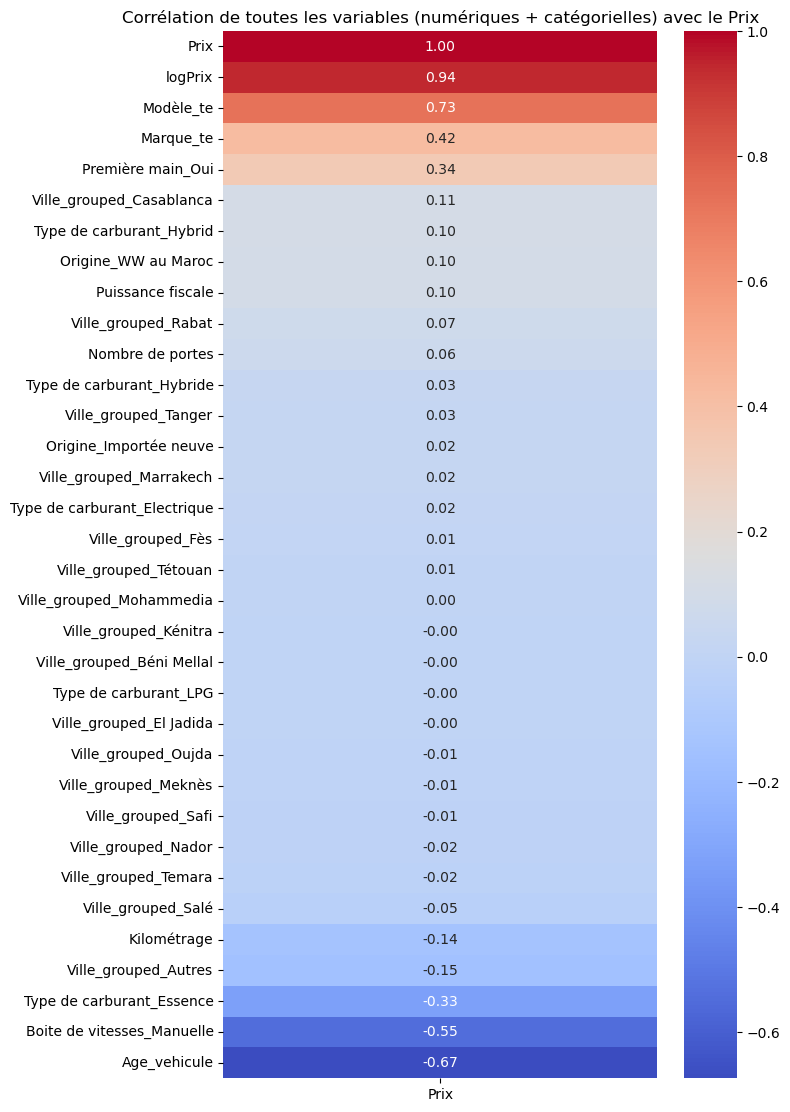

In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# On transforme les colonnes catégorielles en codes numériques
for col in df4_encoded.select_dtypes(include=['object']).columns:
    df4_encoded[col] = df4_encoded[col].astype('category').cat.codes

# Calcul des corrélations avec le prix
corr_with_price = df4_encoded.corr()['Prix'].sort_values(ascending=False)

# Affichage sous forme de heatmap
plt.figure(figsize=(7, len(corr_with_price)*0.4))
sns.heatmap(corr_with_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation de toutes les variables (numériques + catégorielles) avec le Prix")
plt.show()
